In [1]:
# Predicting Student Admissions with Neural Networks in Keras

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv("student_data.csv")
data.head()

,admit,gre,gpa,rank
0,0,380.0,3.61,3.0
1,1,660.0,3.67,3.0
2,1,800.0,4.00,1.0
3,1,640.0,3.19,4.0
4,0,520.0,2.93,4.0


In [16]:
# X= np.array(data[['gre','gpa']])
# y= np.array(data['admit'])

# admitted = X[np.argwhere(y==1)]
# rejected = X[np.argwhere(y==0)]

admitted[0][0]

array([660.  ,   3.67])

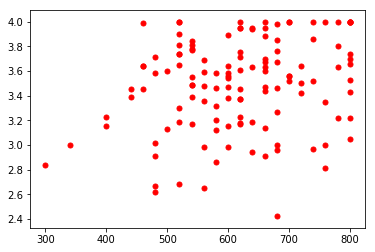

In [19]:
plt.scatter([s[0][0] for s in admitted],[s[0][1] for s in admitted],s=25, color = 'red')
plt.show()

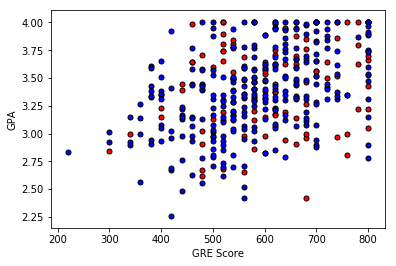

In [23]:

## Plot Data 

def plot_data(data):
    X=np.array(data[['gre','gpa']])
    y=np.array(data['admit'])
    
    admitted = X[np.argwhere(y==1)]
    rejected = X[np.argwhere(y==0)]
    
    plt.scatter([s[0][0] for s in admitted],[s[0][1] for s in admitted],s=25, color = 'red',edgecolor = 'k')
    plt.scatter([s[0][0] for s in rejected],[s[0][1] for s in rejected],s=25, color = 'blue',edgecolor = 'k')
    plt.xlabel("GRE Score")
    plt.ylabel("GPA")
    
    plt.show()
    
    
plot_data(data)    
    

In [24]:
## Make 4  plots, each one for each rank
data_rank1 = data[data['rank']==1]
data_rank2 = data[data['rank']==2]
data_rank3 = data[data['rank']==3]
data_rank4 = data[data['rank']==4]

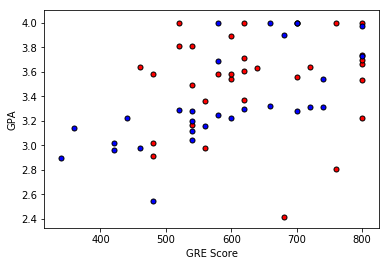

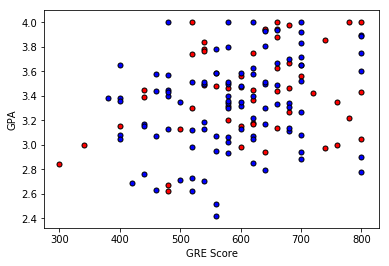

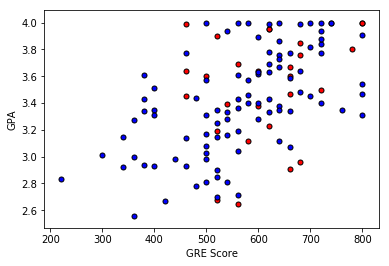

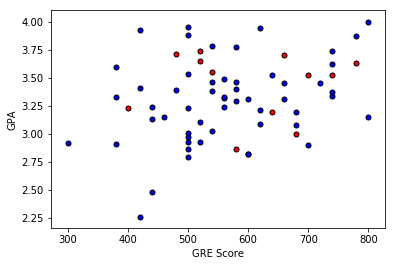

In [27]:
plot_data(data_rank1)
plt.show()
plot_data(data_rank2)
plt.show()
plot_data(data_rank3)
plt.show()
plot_data(data_rank4)
plt.show()

In [34]:
## use rank as input, turn to one-hot 
#pd.get_dummies(data['rank'],prefix=['rank'])#.columns(['rank_1','rank_2','rank_3','rank_4'])

one_hot_data = pd.concat([data,pd.get_dummies(data['rank'],prefix=['rank'])],axis=1)

In [42]:
one_hot_data = one_hot_data.drop('rank',axis=1)

In [44]:
one_hot_data.columns =  ['admit','gre','gpa','rank_1','rank_2','rank_3','rank_4']

In [46]:
one_hot_data.head()

,admit,gre,gpa,rank_1,rank_2,rank_3,rank_4
0,0,380.0,3.61,0,0,1,0
1,1,660.0,3.67,0,0,1,0
2,1,800.0,4.00,1,0,0,0
3,1,640.0,3.19,0,0,0,1
4,0,520.0,2.93,0,0,0,1


In [47]:
## Scaling the data
#The next step is to scale the data. We notice that the range for grades is 1.0-4.0, whereas the range for test scores is 
# roughly 200-800, which is much larger. This means our data is skewed, and that makes it hard for a neural network to handle. 
# Let's fit our two features into a range of 0-1, by dividing the grades by 4.0, and the test score by 800.
processed_data = one_hot_data[:]
processed_data['gre'] = processed_data['gre']/800
processed_data['gpa'] = processed_data['gre']/4.0


In [48]:
## train/test split 
from sklearn.model_selection import train_test_split
train, test = train_test_split(processed_data, test_size=0.1)

In [50]:
print("Number of training samples is", len(train))
print("Number of testing samples is", len(test))
print(train[:10])
print(test[:10])

Number of training samples is 360
Number of testing samples is 40
     admit    gre      gpa  rank_1  rank_2  rank_3  rank_4
200      0  1.000  0.25000       0       0       1       0
148      1  0.600  0.15000       1       0       0       0
342      0  0.625  0.15625       0       0       0       1
60       1  0.775  0.19375       0       1       0       0
264      1  0.650  0.16250       0       0       1       0
381      1  0.675  0.16875       0       1       0       0
123      0  0.625  0.15625       0       0       1       0
104      1  0.825  0.20625       0       1       0       0
24       1  0.950  0.23750       0       1       0       0
306      1  0.675  0.16875       1       0       0       0
     admit    gre      gpa  rank_1  rank_2  rank_3  rank_4
390      1  1.000  0.25000       0       1       0       0
324      0  0.650  0.16250       0       0       1       0
33       1  1.000  0.25000       0       0       1       0
353      0  0.875  0.21875       0       1       

In [57]:
## Modeling 
import keras 

X_train = np.array(train.drop('admit',axis=1))
y_train = np.array(keras.utils.to_categorical(train['admit'], 2))

X_test = np.array(test.drop('admit',axis=1))
y_test = np.array(keras.utils.to_categorical(test['admit'], 2))


In [58]:
print(X_train[:10])
print(y_train[:10])

[[1.      0.25    0.      0.      1.      0.     ]
 [0.6     0.15    1.      0.      0.      0.     ]
 [0.625   0.15625 0.      0.      0.      1.     ]
 [0.775   0.19375 0.      1.      0.      0.     ]
 [0.65    0.1625  0.      0.      1.      0.     ]
 [0.675   0.16875 0.      1.      0.      0.     ]
 [0.625   0.15625 0.      0.      1.      0.     ]
 [0.825   0.20625 0.      1.      0.      0.     ]
 [0.95    0.2375  0.      1.      0.      0.     ]
 [0.675   0.16875 1.      0.      0.      0.     ]]
[[1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]]


In [59]:
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.optimizers import SGD
from keras.utils import np_utils

In [63]:
model = Sequential()
model.add(Dense(128,input_dim = X_train.shape[1]))
model.add(Activation('relu'))
model.add(Dense(32))
model.add(Activation('relu'))
model.add(Dense(2))
model.add(Activation('softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 128)               896       
_________________________________________________________________
activation_4 (Activation)    (None, 128)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 32)                4128      
_________________________________________________________________
activation_5 (Activation)    (None, 32)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 2)                 66        
_________________________________________________________________
activation_6 (Activation)    (None, 2)                 0         
Total params: 5,090
Trainable params: 5,090
Non-trainable params: 0
_________________________________________________________________


In [66]:
model.fit(X_train,y_train,epochs=1000, batch_size=100, verbose=0)

In [67]:
train_score = model.evaluate(X_train, y_train)
print("Training Accuracy: ",train_score[1])

test_score = model.evaluate(X_test, y_test)
print("Testing Accuracy: ",test_score[1])


360/360 [==============================] - 0s 39us/step
Training Accuracy:  0.6916666666666667
40/40 [==============================] - 0s 100us/step
Testing Accuracy:  0.6
